In [ ]:
Data Collection.
    o	Collect the dataset or Create the dataset
•	Data Preprocessing.
    o	Import the Libraries.
    o	Importing the dataset.
    o	Checking for Null Values.
    o	Data Visualization.
    o	Outlier Detection
    o	Splitting Dependent and Independent variables
    o-	Encoding
    o	Feature Scaling.
    o	Splitting Data into Train and Test.

# •	Data Preprocessing.


### 1. Import the Libraries.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### 2. Importing the dataset.


In [2]:
df=pd.read_csv("Titanic-Dataset.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.shape

(891, 12)

In [6]:
df.corr() 

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [7]:
df.corr().Survived.sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

### 3. Checking for Null Values.


In [8]:
df.isnull().any() 

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool

In [9]:
df.Parch.nunique()     #parents children

7

In [10]:
df.Parch.unique()    

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [12]:
df["Age"].fillna(df["Age"].mean(), inplace=True)


In [13]:
df["Cabin"].fillna(df["Cabin"].mode()[0], inplace=True)


In [14]:
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)


In [15]:
df.isnull().any() 

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age            False
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin          False
Embarked       False
dtype: bool

In [16]:
df.isnull().sum() 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [17]:
df["Age"].mean()


29.699117647058763

In [18]:
df["Cabin"].mode()


0    B96 B98
dtype: object

In [19]:
df["Embarked"].mode()


0    S
dtype: object

In [20]:
df.corr().Fare.sort_values(ascending=False)

Fare           1.000000
Survived       0.257307
Parch          0.216225
SibSp          0.159651
Age            0.091566
PassengerId    0.012658
Pclass        -0.549500
Name: Fare, dtype: float64

In [21]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


### 4. Data Visualization.


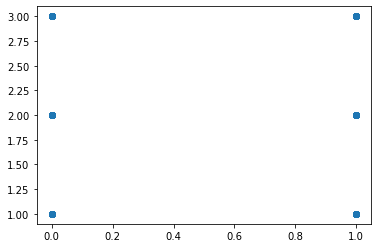

In [22]:
plt.scatter(df["Survived"],df["Pclass"])

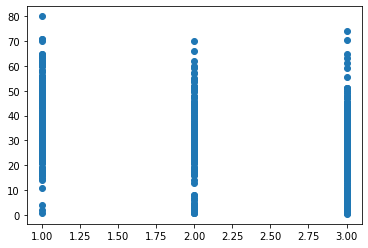

In [23]:
plt.scatter(df["Pclass"],df["Age"])

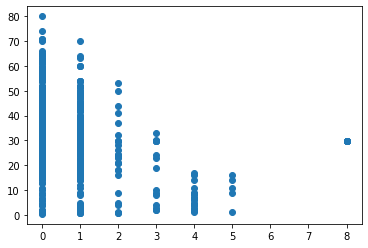

In [24]:
plt.scatter(df["SibSp"],df["Age"])

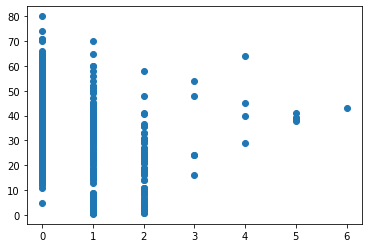

In [25]:
plt.scatter(df["Parch"],df["Age"])

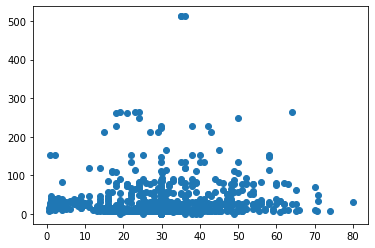

In [26]:
plt.scatter(df["Age"],df["Fare"])

<AxesSubplot:>

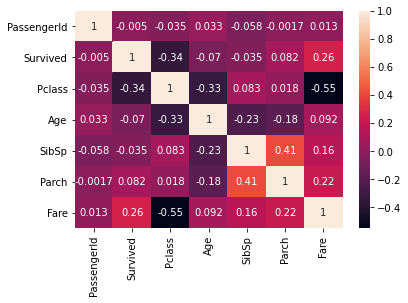

In [27]:
sns.heatmap(df.corr(),annot=True)

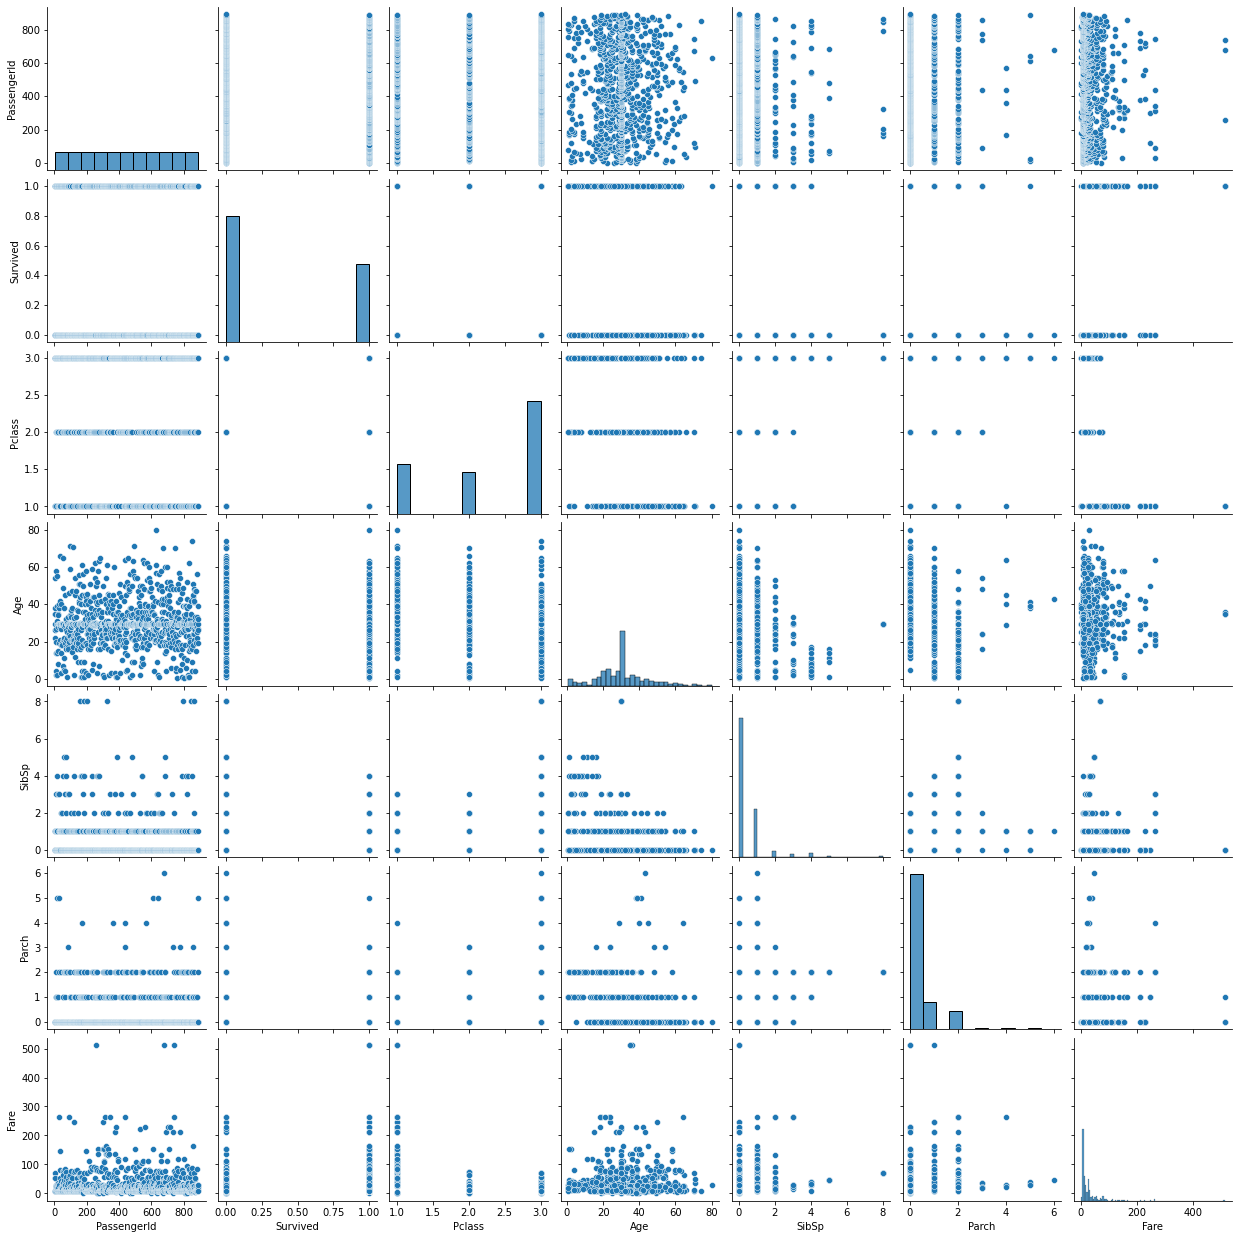

In [28]:
sns.pairplot(df)   

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

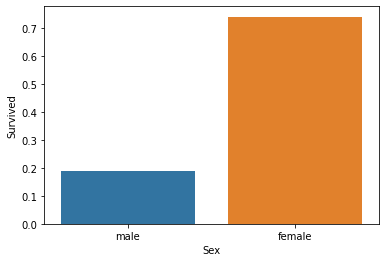

In [29]:
sns.barplot(x=df['Sex'],y=df['Survived'], ci=None)

<AxesSubplot:xlabel='Embarked', ylabel='Age'>

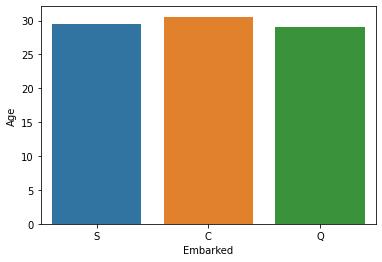

In [30]:
sns.barplot(x=df['Embarked'],y=df['Age'], ci=None)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

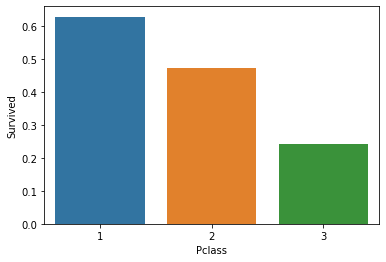

In [31]:
sns.barplot(x=df['Pclass'],y=df['Survived'], ci=None)

<AxesSubplot:xlabel='SibSp', ylabel='Age'>

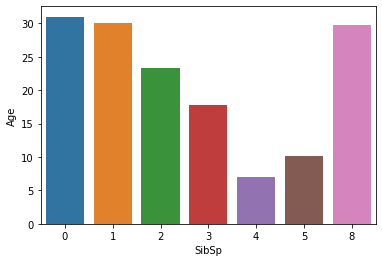

In [32]:
sns.barplot(x=df['SibSp'],y=df['Age'], ci=None)

In [37]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


### 5. Outlier Detection


C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass'>

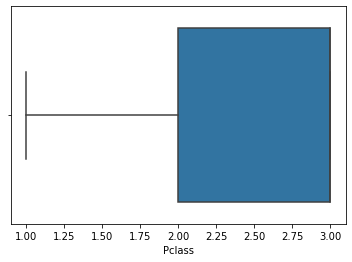

In [109]:
sns.boxplot(df['Pclass']) 

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

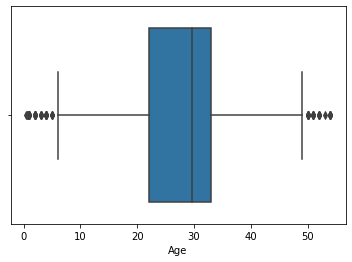

In [110]:
sns.boxplot(df['Age']) 

In [111]:
# for removing outliers of age boxplot
Q1 = df.Age.quantile(0.25)
Q3 = df.Age.quantile(0.75)
IQR=Q3-Q1
IQR

11.0

In [112]:
upper_limit=Q3+1.5*IQR
upper_limit

49.5

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

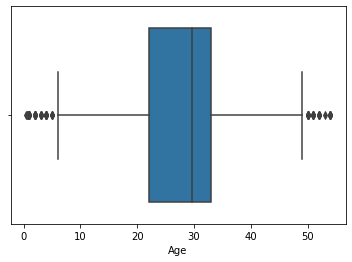

In [113]:
df = df[df.SibSp<upper_limit]
sns.boxplot(df.Age)

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='SibSp'>

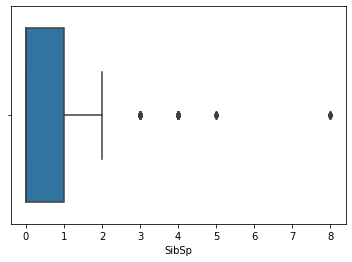

In [114]:
sns.boxplot(df['SibSp']) 

C:\Users\ACER\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Parch'>

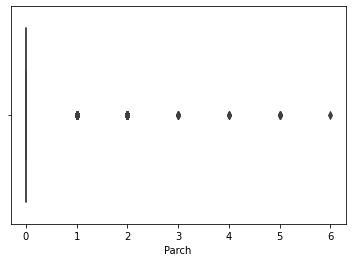

In [115]:
sns.boxplot(df['Parch']) 

### 6. Splitting Dependent and Independent variables


In [116]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [131]:
# x=df.iloc[:,2:12]    # to access independent var
# x.head()

,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [163]:
x=df.drop(columns=["Survived"],axis=1)   # to access independent var
x.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [164]:
# depeendnent var shuld be in only series
y=df["Survived"]
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [165]:
y=df.iloc[:,1:2]
y.head()                   # dependent var 

,Survived
0,0
1,1
2,1
3,1
4,0


In [166]:
df.shape

(849, 12)

In [167]:
x.shape

(849, 11)

In [168]:
y.shape

(849, 1)

### 7.Encoding


In [169]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [170]:
columns_to_drop = ['Name', 'Ticket', 'Cabin']
x = x.drop(columns=columns_to_drop)


In [171]:
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,male,22.0,1,0,7.2500,S
1,2,1,female,38.0,1,0,71.2833,C
2,3,3,female,26.0,0,0,7.9250,S
3,4,1,female,35.0,1,0,53.1000,S
4,5,3,male,35.0,0,0,8.0500,S


In [172]:
x["Sex"]=le.fit_transform(x["Sex"])
x["Sex"].head()

0    1
1    0
2    0
3    0
4    1
Name: Sex, dtype: int32

In [173]:
x["Sex"].value_counts()

1    545
0    304
Name: Sex, dtype: int64

In [174]:
print(le.classes_)

['female' 'male']


In [175]:
x["Embarked"]=le.fit_transform(x["Embarked"])
x["Embarked"]

0      2
1      0
2      2
3      2
4      2
      ..
886    2
887    2
888    2
889    0
890    1
Name: Embarked, Length: 849, dtype: int32

In [176]:
df["Embarked"].value_counts()

S    618
C    157
Q     74
Name: Embarked, dtype: int64

In [177]:
print(le.classes_)

['C' 'Q' 'S']


In [178]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [179]:
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,2
1,2,1,0,38.0,1,0,71.2833,0
2,3,3,0,26.0,0,0,7.9250,2
3,4,1,0,35.0,1,0,53.1000,2
4,5,3,1,35.0,0,0,8.0500,2


### 8.Feature Scaling -- performed on only independent variables


In [182]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

In [183]:
x_train=sc.fit_transform(x_train)    
x_train=sc.fit_transform(x_test)

In [184]:
x_train

array([[-0.85965447,  0.80140535,  0.71335527, ..., -0.46334982,
        -0.44830806,  0.56609328],
       [-0.5322282 , -1.67566573, -1.40182605, ..., -0.46334982,
         0.53339025, -1.9664293 ],
       [-0.74661445,  0.80140535, -1.40182605, ...,  2.49050528,
        -0.22418286,  0.56609328],
       ...,
       [ 0.99965901,  0.80140535, -1.40182605, ...,  1.01357773,
        -0.34299346, -1.9664293 ],
       [ 0.37988785, -0.43713019,  0.71335527, ..., -0.46334982,
        -0.10476977,  0.56609328],
       [ 0.56309065,  0.80140535,  0.71335527, ..., -0.46334982,
        -0.49421633,  0.56609328]])

In [185]:
x_train

array([[-0.85965447,  0.80140535,  0.71335527, ..., -0.46334982,
        -0.44830806,  0.56609328],
       [-0.5322282 , -1.67566573, -1.40182605, ..., -0.46334982,
         0.53339025, -1.9664293 ],
       [-0.74661445,  0.80140535, -1.40182605, ...,  2.49050528,
        -0.22418286,  0.56609328],
       ...,
       [ 0.99965901,  0.80140535, -1.40182605, ...,  1.01357773,
        -0.34299346, -1.9664293 ],
       [ 0.37988785, -0.43713019,  0.71335527, ..., -0.46334982,
        -0.10476977,  0.56609328],
       [ 0.56309065,  0.80140535,  0.71335527, ..., -0.46334982,
        -0.49421633,  0.56609328]])

In [186]:
x.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.0,1,0,7.2500,2
1,2,1,0,38.0,1,0,71.2833,0
2,3,3,0,26.0,0,0,7.9250,2
3,4,1,0,35.0,1,0,53.1000,2
4,5,3,1,35.0,0,0,8.0500,2


In [187]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,B96 B98,S


In [188]:
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()

In [189]:
X_scaled=pd.DataFrame(ms.fit_transform(x),columns=x.columns)
X_scaled.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.000000,1.0,1.0,0.402762,0.125,0.0,0.014151,1.0
1,0.001124,0.0,0.0,0.701381,0.125,0.0,0.139136,0.0
2,0.002247,1.0,0.0,0.477417,0.000,0.0,0.015469,1.0
3,0.003371,0.0,0.0,0.645390,0.125,0.0,0.103644,1.0
4,0.004494,1.0,1.0,0.645390,0.000,0.0,0.015713,1.0


### 9.splitting into train and test 


In [180]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0)

In [181]:
x_train.shape, x_test.shape,y_train.shape,y_test.shape

((594, 8), (255, 8), (594, 1), (255, 1))